In [ ]:
'''
RAPIDS is an open-source suite of data science and analytics software and libraries developed by NVIDIA.
       It aims to bring the power of GPUs to data science workflows, enabling faster data processing and machine learning.
RAPIDS leverages NVIDIA CUDA for low-level, high-performance GPU parallel computing. The key components of RAPIDS include:
(1) cuML: The machine learning library within RAPIDS, offering GPU-accelerated implementations of various machine learning algorithms, similar to scikit-learn.
'''

In [1]:
# This get the RAPIDS-Colab install files and test check your GPU.  Run this and the next cell only.
# Please read the output of this cell.  If your Colab Instance is not RAPIDS compatible, it will warn you and give you remediation steps.
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
!python rapidsai-csp-utils/colab/pip-install.py


Cloning into 'rapidsai-csp-utils'...
remote: Enumerating objects: 481, done.
remote: Counting objects: 100% (212/212), done.
remote: Compressing objects: 100% (121/121), done.
remote: Total 481 (delta 143), reused 124 (delta 91), pack-reused 269
Receiving objects: 100% (481/481), 133.58 KiB | 10.28 MiB/s, done.
Resolving deltas: 100% (245/245), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 1.5 MB/s eta 0:00:00
***********************************************************************
Woo! Your instance has a Tesla T4 GPU!
We will install the latest stable RAPIDS via pip 24.4.*!  Please stand by, should be quick...
***********************************************************************

Looking in indexes: https://pypi.org/simple, https://pypi.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 GB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 GB 877.5 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.8/137.8 MB 7

In [2]:
import cuml
cuml.__version__

'24.04.00'

Time taken with reference size 100 and k=5: 0.0464 seconds
Time taken with reference size 1000 and k=5: 0.0164 seconds
Time taken with reference size 10000 and k=5: 0.0166 seconds
Time taken with reference size 50000 and k=5: 0.0206 seconds
Time taken with reference size 100000 and k=5: 0.0194 seconds
Time taken with reference size 1000000 and k=5: 0.1421 seconds


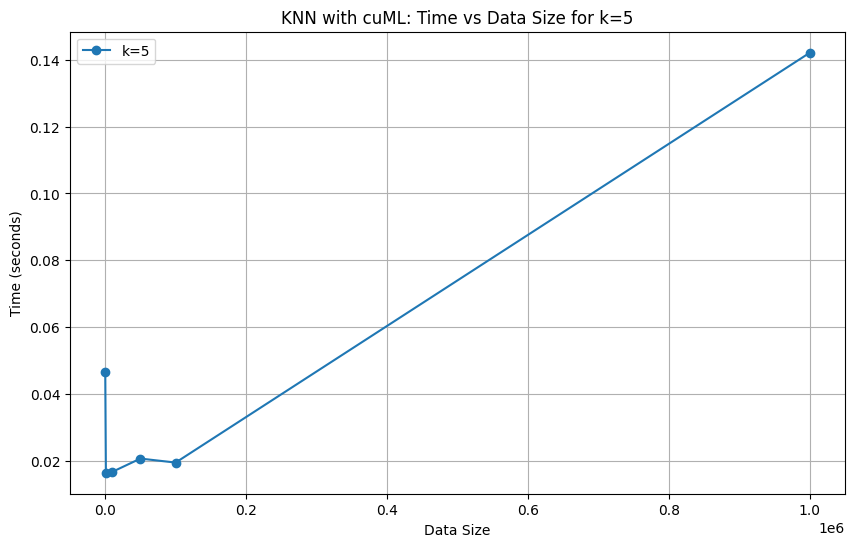

Time taken with reference size 100 and k=7: 0.0466 seconds
Time taken with reference size 1000 and k=7: 0.0355 seconds
Time taken with reference size 10000 and k=7: 0.0813 seconds
Time taken with reference size 50000 and k=7: 0.0383 seconds
Time taken with reference size 100000 and k=7: 0.0349 seconds
Time taken with reference size 1000000 and k=7: 0.1279 seconds


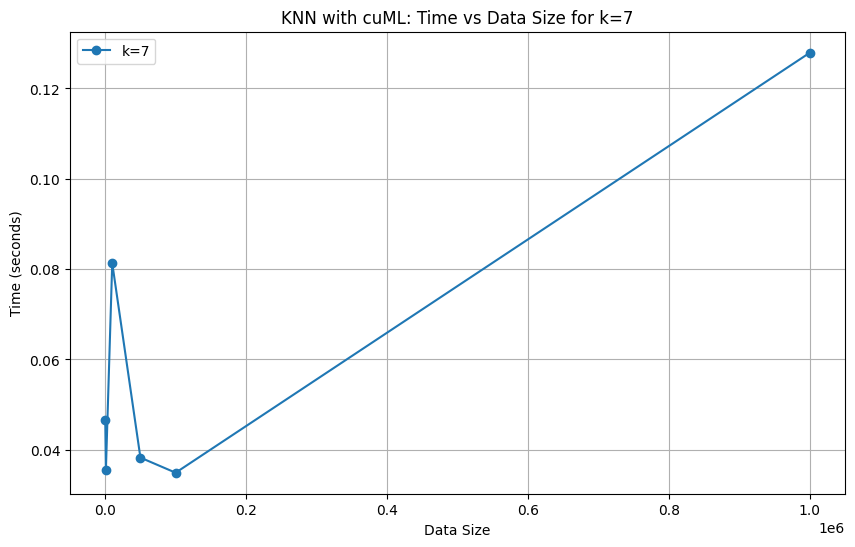

Time taken with reference size 100 and k=17: 0.0759 seconds
Time taken with reference size 1000 and k=17: 0.0564 seconds
Time taken with reference size 10000 and k=17: 0.0593 seconds
Time taken with reference size 50000 and k=17: 0.0953 seconds
Time taken with reference size 100000 and k=17: 0.0574 seconds
Time taken with reference size 1000000 and k=17: 0.1422 seconds


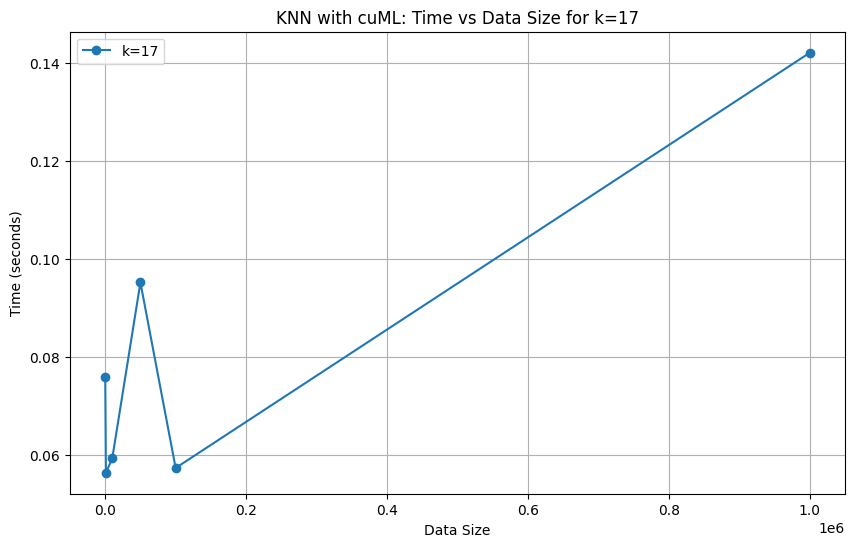

Skipping size 100 for k=111 since k > size
Time taken with reference size 1000 and k=111: 0.2657 seconds
Time taken with reference size 10000 and k=111: 0.2188 seconds
Time taken with reference size 50000 and k=111: 0.2634 seconds
Time taken with reference size 100000 and k=111: 0.1715 seconds
Time taken with reference size 1000000 and k=111: 0.2758 seconds


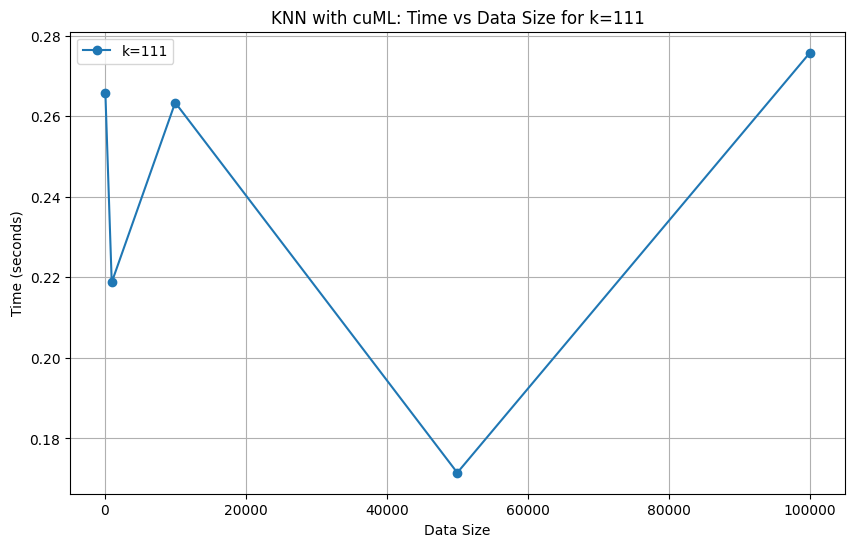

Skipping size 100 for k=231 since k > size
Time taken with reference size 1000 and k=231: 0.4585 seconds
Time taken with reference size 10000 and k=231: 0.1387 seconds
Time taken with reference size 50000 and k=231: 0.1399 seconds
Time taken with reference size 100000 and k=231: 0.1430 seconds
Time taken with reference size 1000000 and k=231: 0.2689 seconds


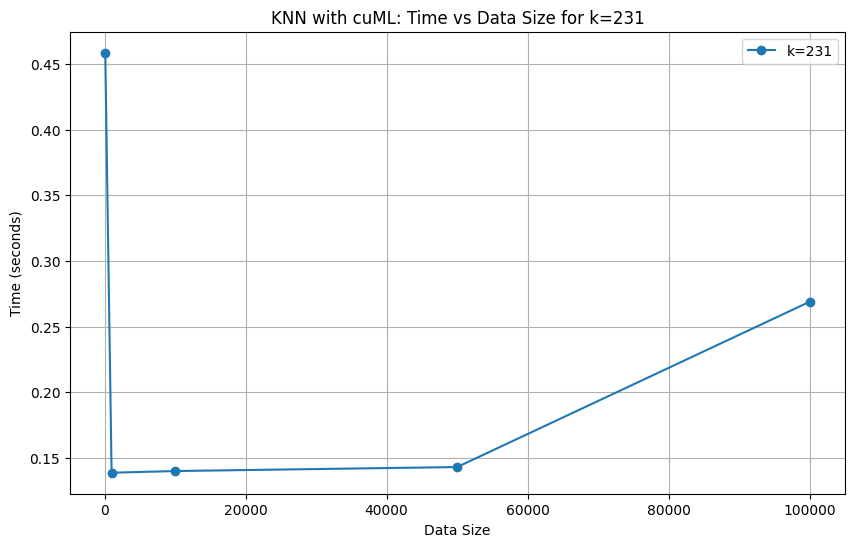

In [4]:
import numpy as np
import cudf
from cuml.neighbors import NearestNeighbors
import time
import matplotlib.pyplot as plt

# Define different sizes for reference.
sizes = [100, 1000, 10000, 50000, 100000, 1000000]
k_values = [5, 7, 17, 111, 231]
dim = 3

def measure_cuml_knn_time(reference_points, query_points, k):
    # Convert to cuDF DataFrame
    reference_points_cudf = cudf.DataFrame.from_records(reference_points)
    query_points_cudf = cudf.DataFrame.from_records(query_points)

    # Initialize cuML NearestNeighbors
    knn = NearestNeighbors(n_neighbors=k, algorithm='brute')

    start_time = time.time()
    knn.fit(reference_points_cudf)
    distances, indices = knn.kneighbors(query_points_cudf)
    end_time = time.time()

    return end_time - start_time

for k in k_values:
    times = []
    for size in sizes:
        if k > size:
            print(f"Skipping size {size} for k={k} since k > size")
            continue

        # Generate random data
        reference_points = np.random.rand(size, dim).astype(np.float32)
        query_points = np.random.rand(1000, dim).astype(np.float32)

        # Measure time using cuML
        time_taken = measure_cuml_knn_time(reference_points, query_points, k)
        times.append(time_taken)
        print(f"Time taken with reference size {size} and k={k}: {time_taken:.4f} seconds")

    # Plot the results
    if times:
        plt.figure(figsize=(10, 6))
        plt.plot(sizes[:len(times)], times, marker='o', label=f'k={k}')
        plt.title(f'KNN with cuML: Time vs Data Size for k={k}')
        plt.xlabel('Data Size')
        plt.ylabel('Time (seconds)')
        plt.grid(True)
        plt.legend()
        plt.show()
